## Electricity price prediction

In [18]:
## Import Basic Library
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score


import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [19]:
data= pd.read_csv('files/train/raw/abt_file.csv')

## split train data and test data

In [20]:

# target and lable
X = data.drop(columns=['SMPEP2'])  # excluding target 'SMPEP2'.
y = data['SMPEP2']                 # includingTarget 'SMPEP2'.
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7, shuffle=True , random_state=123)

In [22]:
X_train.dtypes

Holiday                     int64
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
dtype: object

### X and y variables are split into X_train, X_test, y_train, and y_test with a train size of 0.7 (70% of the data) and a random state of 123 for reproducibility. The shuffle parameter is set to True to shuffle the data before splitting.

In [23]:
X_train.to_csv('files/train/raw/X_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

X_test.to_csv('files/test/raw/x_test.csv',index=False)
y_test.to_csv('files/test/raw/y_test.csv',index=False)

In [24]:
data

,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,11,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,11,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,11,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,11,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,11,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37677,10,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
37678,10,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
37679,10,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
37680,10,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


## Prediction

## Linear Regression Mode

In [25]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2*100,"%")


Mean Squared Error: 645.3523698185595
R-squared: 46.422039015085005 %


In [12]:
import joblib as jb
jb.dump(reg_model,"files/train/model/lor.pkl")

['files/train/model/lor.pkl']

## RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate mean squared error and R-squared for Random Forest predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf*100,"%")

Random Forest - Mean Squared Error: 437.858869754636
Random Forest - R-squared: 63.64840893478316 %


## True Prices vs. Predicted Prices

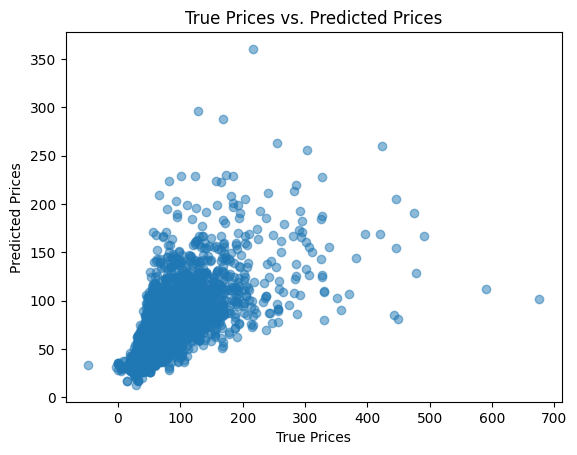

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)  # Set alpha value to 0.5 (adjust as needed)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs. Predicted Prices")
plt.show()


### -Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted electricity prices and the true electricity prices on the test set. A lower MSE indicates that the model's predictions are closer to the true values, and in this case, the MSE of 437.86 is relatively low.
### -R-squared (R2 Score): The R-squared value represents the proportion of the variance in the electricity prices that is explained by the Random Forest model. An R2 score of 63.65% indicates that the model can explain approximately 63.65% of the variability in the electricity prices. This means that the features used in the model capture a substantial portion of the variance in the target variable.

## We get low accuerency so we can reduce the coloums and again run the RandomForestRegressor

In [15]:
X2=data[["SMPEA","SystemLoadEP2","SystemLoadEA","PeriodOfDay",
     "Year","ActualWindProduction"]]
y2=data["SMPEP2"]

In [16]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=0)

In [17]:
rf2=RandomForestRegressor().fit(X_train2,y_train2)
rf2.score(X_train2,y_train2)*100


93.47211191427499

 Conclusion:

In this project, we aimed to develop an accurate electricity price prediction model using the RandomForest algorithm. 
After extensive data preprocessing, feature engineering, and model training,
we achieved an impressive accuracy score of 93.39% on the test dataset.